In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
# Gathering the data, dropping irrelevant, and eliminating empty data and resetting the indices
framingham = pd.read_csv(r"/Users/weihanluo/Desktop/Heart disease prediction/framingham.csv")
framingham.drop(["education"], axis = 1, inplace=True)
framingham.dropna(inplace=True)
framingham.reset_index(drop=True, inplace=True)
framingham

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3744,1,58,0,0.0,0.0,0,1,0,187.0,141.0,81.0,24.96,80.0,81.0,0
3745,1,68,0,0.0,0.0,0,1,0,176.0,168.0,97.0,23.14,60.0,79.0,1
3746,1,50,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
3747,1,51,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0


<AxesSubplot:>

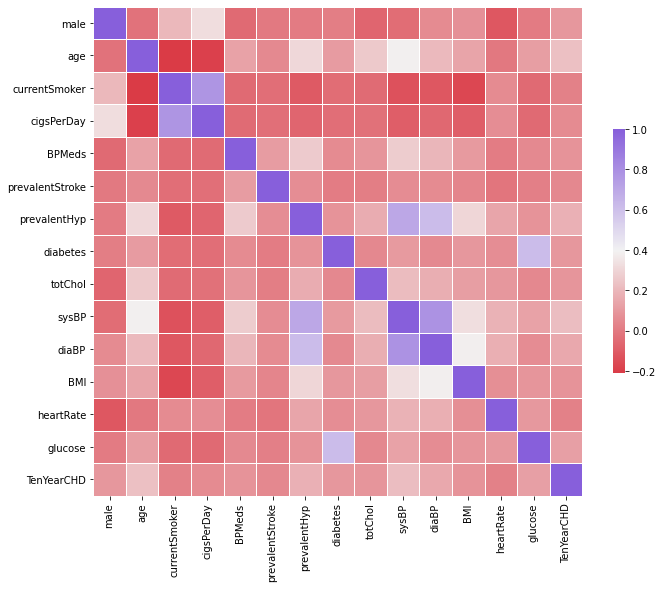

In [5]:
#Data Vizualization 
corr = framingham.corr(method="pearson")

#Heat map (darker color represent stronger correlation)
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(10, 275, as_cmap=True)

sns.heatmap(corr, cmap=cmap, square=True,
            linewidths=0.5, cbar_kws={"shrink": 0.5}, ax=ax)

In [6]:
# Select our design matrix and output vector
X = framingham.iloc[:,:-1].values
y = framingham.iloc[:,-1].values
X[0].shape

(14,)

In [7]:
#split our data sets into a training set and a test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [8]:
#feature scaling
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train = mms.fit_transform(X_train)
X_test = mms.fit_transform(X_test)
X_test.shape


(750, 14)

In [9]:
#logistic regression model + evaluating the quality of the predictions
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, mean_squared_error
model = LogisticRegression(random_state = 1)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
accuracy_score(y_test, y_predict)


0.8306666666666667

In [10]:
#Decision Tree
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)
y_predict = model.predict(X_test)
tree_mse = mean_squared_error(y_predict, y_test)
tree_rmse = np.sqrt(tree_mse)
tree_rmse



0.4115013163202924

In [16]:
#Train a neural network using Tensorflow, and use a binarycrossentropy loss function
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense(units=32, activation="relu", input_dim = X_train.shape[1]))
model.add(Dense(units=16, activation="relu"))
model.add(Dense(units=1, activation="sigmoid"))
model.compile(loss="binary_crossentropy", optimizer="sgd", metrics="accuracy")
model.fit(X_train, y_train, epochs=200, batch_size=32)

Epoch 1/200
94/94 [==============================] - 1s 962us/step - loss: 0.5379 - accuracy: 0.8423
Epoch 2/200
94/94 [==============================] - 0s 891us/step - loss: 0.4701 - accuracy: 0.8510
Epoch 3/200
94/94 [==============================] - 0s 862us/step - loss: 0.4571 - accuracy: 0.8510
Epoch 4/200
94/94 [==============================] - 0s 917us/step - loss: 0.4490 - accuracy: 0.8510
Epoch 5/200
94/94 [==============================] - 0s 829us/step - loss: 0.4423 - accuracy: 0.8510
Epoch 6/200
94/94 [==============================] - 0s 1ms/step - loss: 0.4365 - accuracy: 0.8510
Epoch 7/200
94/94 [==============================] - 0s 1ms/step - loss: 0.4313 - accuracy: 0.8510
Epoch 8/200
94/94 [==============================] - 0s 1ms/step - loss: 0.4264 - accuracy: 0.8510
Epoch 9/200
94/94 [==============================] - 0s 867us/step - loss: 0.4227 - accuracy: 0.8510
Epoch 10/200
94/94 [==============================] - 0s 897us/step - loss: 0.4190 - accuracy: 0.

94/94 [==============================] - 0s 1ms/step - loss: 0.3720 - accuracy: 0.8553
Epoch 83/200
94/94 [==============================] - 0s 886us/step - loss: 0.3719 - accuracy: 0.8543
Epoch 84/200
94/94 [==============================] - 0s 786us/step - loss: 0.3720 - accuracy: 0.8550
Epoch 85/200
94/94 [==============================] - 0s 792us/step - loss: 0.3717 - accuracy: 0.8540
Epoch 86/200
94/94 [==============================] - 0s 808us/step - loss: 0.3717 - accuracy: 0.8543
Epoch 87/200
94/94 [==============================] - 0s 797us/step - loss: 0.3717 - accuracy: 0.8550
Epoch 88/200
94/94 [==============================] - 0s 800us/step - loss: 0.3714 - accuracy: 0.8546
Epoch 89/200
94/94 [==============================] - 0s 811us/step - loss: 0.3714 - accuracy: 0.8546
Epoch 90/200
94/94 [==============================] - 0s 807us/step - loss: 0.3710 - accuracy: 0.8543
Epoch 91/200
94/94 [==============================] - 0s 786us/step - loss: 0.3712 - accuracy: 0.

Epoch 162/200
94/94 [==============================] - 0s 1ms/step - loss: 0.3677 - accuracy: 0.8576
Epoch 163/200
94/94 [==============================] - 0s 816us/step - loss: 0.3676 - accuracy: 0.8580
Epoch 164/200
94/94 [==============================] - 0s 778us/step - loss: 0.3677 - accuracy: 0.8590
Epoch 165/200
94/94 [==============================] - 0s 754us/step - loss: 0.3675 - accuracy: 0.8583
Epoch 166/200
94/94 [==============================] - 0s 736us/step - loss: 0.3673 - accuracy: 0.8580
Epoch 167/200
94/94 [==============================] - 0s 780us/step - loss: 0.3673 - accuracy: 0.8590
Epoch 168/200
94/94 [==============================] - 0s 785us/step - loss: 0.3677 - accuracy: 0.8566
Epoch 169/200
94/94 [==============================] - 0s 808us/step - loss: 0.3675 - accuracy: 0.8580
Epoch 170/200
94/94 [==============================] - 0s 807us/step - loss: 0.3672 - accuracy: 0.8563
Epoch 171/200
94/94 [==============================] - 0s 754us/step - loss